# Incoming Tourism Data Analysis for Latvia  

### Final project for SheGoesTech Accenture Bootcamp

May, 2023

Welcome to our project on analyzing incoming tourism data for Latvia. Our goal is to gain insights into the demographics and spending habits of tourists visiting Latvia and to identify any trends or changes over time. 

To achieve this, we will be using various technologies such as numpy, pandas, matplotlib, and seaborn to analyze and visualize the data. Additionally, we will be using pyscbwrapper to access statistical data related to tourism in Latvia.

Project authors:  
    <ul>
    <li> Tatjana Sporihina </li> 
    <li> Krista </li>
    </ul>

In [1]:
pip install pyscbwrapper

Note: you may need to restart the kernel to use updated packages.


In [1]:
from pyscbwrapper import SCB
#IMPORTANT: the file scb.py in the package folder must be replaced with the one from the link below 
#https://stat.gov.lv/lv/api-un-kodu-vardnicas/api 

In [2]:
import pandas as pd 

### Data tables for incoming tourists 

In [3]:
#Creating SCB objects for each table 
#Example URL: https://data.stat.gov.lv:443/api/v1/lv/OSP_PUB/START/NOZ/TU/TUA/TUA030 
tua030 = SCB('en', 'NOZ', 'TU', 'TUA', 'TUA030') #Expenditures by country and avg trip length 
tua010 = SCB('en', 'NOZ', 'TU', 'TUA', 'TUA010') #Single and multi day travellers by countries 
tua050 = SCB('en', 'NOZ', 'TU', 'TUA', 'TUA050') #Goals of travellers 
tua070 = SCB('en', 'NOZ', 'TU', 'TUA', 'TUA070') #Split by age and gender

In [4]:
#List of tables we want for incoming tourism
tables = [tua030, tua010, tua050, tua070]

#Dictionary with resulting dataframes 
dfs = {}

for i,table in enumerate(tables):
    #Fetching params of each table 
    param = table.info()['variables'][0]['code']
    main_dimension = []
    metrics = []
    metrics_labels = []
    years = []
    countries = []

    for variable in table.info()['variables']:
        if variable['code'] == param:
            main_dimension = variable['values']
            
        if variable['code'] == 'COUNTRY':
            countries = variable['values']

        if variable['code'] == 'ContentsCode':
            metrics = variable['values']
            metrics_labels = variable['valueTexts']

        if variable['code'] == 'TIME':
            years = variable['values'][-10:]
    # Making queries
    if param == 'COUNTRY':
        table.set_query(COUNTRY = main_dimension, TIME = years, ContentsCode = metrics)
    elif param =='NON_RES_TRAVEL':
        table.set_query(NON_RES_TRAVEL = main_dimension, COUNTRY = countries, TIME = years, ContentsCode = metrics)
    elif param =='PURPOSE_TRIP':
        table.set_query(PURPOSE_TRIP = main_dimension, COUNTRY = countries, TIME = years, ContentsCode = metrics)
    elif param =='INDICATOR':
        table.set_query(INDICATOR = main_dimension, COUNTRY = countries, TIME = years, ContentsCode = metrics)
    table.get_query()
    table.get_data()
    scb_data = table.get_data()
    scb_fetch = scb_data['data']
    scb_fetch
    
    #Converting to a dataframe 
    df = pd.DataFrame.from_records(scb_fetch)
    df_name = f"df{i+1}"
    if len(df['key'][0]) == 2: 
          df[[param.title(), 'Year']] = pd.DataFrame(df['key'].tolist())
    elif len(df['key'][0]) == 3: 
          df[[param.title(), 'Country', 'Year']] = pd.DataFrame(df['key'].tolist())
    df[metrics_labels] = pd.DataFrame(df['values'].tolist())
    df = df.drop(columns=['key', 'values'])
    df.replace('…', 0, inplace=True)
    df.replace('-', 0, inplace=True)
    df['Year'] = pd.to_numeric(df['Year'])
    df.iloc[:, 2:] = df.iloc[:, 2:].astype(float)
        
    #Adding to a dictionary 
    dfs[df_name] = df

In [5]:
tua030 = dfs['df1']
tua010 = dfs['df2']
tua050 = dfs['df3']
tua070 = dfs['df4']

In [6]:
tua030.head()
#tua030.to_csv('tua030.csv')

,Country,Year,"Total expenditures of non-resident visitors, million euro","Average daily expenditure per non-resident traveller, euro","Average length of trips, nights"
0,TOTAL,2012,438.1,75.0,4.0
1,TOTAL,2013,481.5,68.6,4.6
2,TOTAL,2014,516.9,66.0,4.2
3,TOTAL,2015,540.8,66.3,4.0
4,TOTAL,2016,474.4,54.1,4.9


In [7]:
tua010.head()
#tua010.to_csv('tua010.csv')

,Non_Res_Travel,Country,Year,Non-resident travellers (thousands)
0,ARRIVALS,TOTAL,2012.0,5568.9
1,ARRIVALS,TOTAL,2013.0,5821.8
2,ARRIVALS,TOTAL,2014.0,6245.9
3,ARRIVALS,TOTAL,2015.0,6841.7
4,ARRIVALS,TOTAL,2016.0,6797.0


In [8]:
tua050.tail()
#tua050.to_csv('tua050.csv')

,Purpose_Trip,Year,Non-resident travellers (thousands)
65,TRANSIT,2017,2619.3
66,TRANSIT,2018,2691.7
67,TRANSIT,2019,3108.3
68,TRANSIT,2020,1242.6
69,TRANSIT,2021,1009.7


In [9]:
tua070.tail(10)
#tua070.to_csv('tua070.csv')

,Indicator,Year,Structure of non-resident travellers
70,Y_GE65,2012,5.4
71,Y_GE65,2013,6.4
72,Y_GE65,2014,4.2
73,Y_GE65,2015,4.2
74,Y_GE65,2016,4.7
75,Y_GE65,2017,3.1
76,Y_GE65,2018,5.0
77,Y_GE65,2019,2.7
78,Y_GE65,2020,2.0
79,Y_GE65,2021,1.9


# Incoming tourism analysis

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [11]:
tua010['Year'] = tua010['Year'].astype(int)
#Total data 
tua030_total = tua030[tua030['Country'] == 'TOTAL']
tua010_total = tua010[(tua010['Country'] == 'TOTAL') & (tua010['Non_Res_Travel'] == 'ARRIVALS')]
tua030_total.head()

,Country,Year,"Total expenditures of non-resident visitors, million euro","Average daily expenditure per non-resident traveller, euro","Average length of trips, nights"
0,TOTAL,2012,438.1,75.0,4.0
1,TOTAL,2013,481.5,68.6,4.6
2,TOTAL,2014,516.9,66.0,4.2
3,TOTAL,2015,540.8,66.3,4.0
4,TOTAL,2016,474.4,54.1,4.9


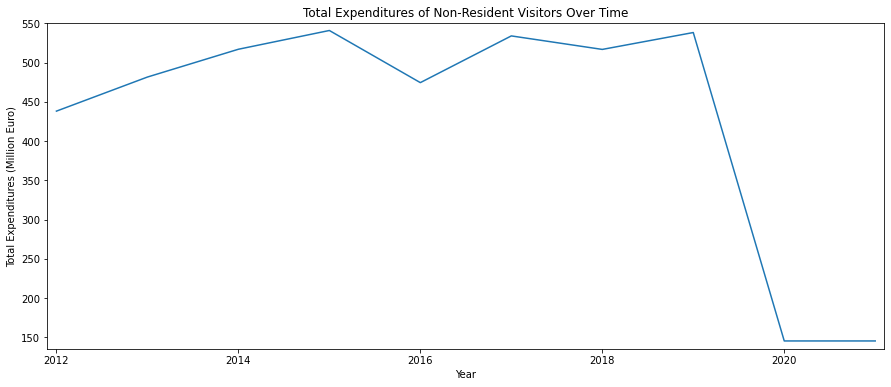

In [12]:
plt.figure(figsize=(15,6));
plt.plot(tua030_total["Year"], tua030_total["Total expenditures of non-resident visitors, million euro"])

plt.xlabel("Year")
plt.ylabel("Total Expenditures (Million Euro)")
plt.title("Total Expenditures of Non-Resident Visitors Over Time")
plt.xlim(min(tua030_total["Year"])-0.1, max(tua030_total["Year"])+0.1)
plt.ylim(min(tua030_total["Total expenditures of non-resident visitors, million euro"])-10, 
         max(tua030_total["Total expenditures of non-resident visitors, million euro"])+10)
plt.show()

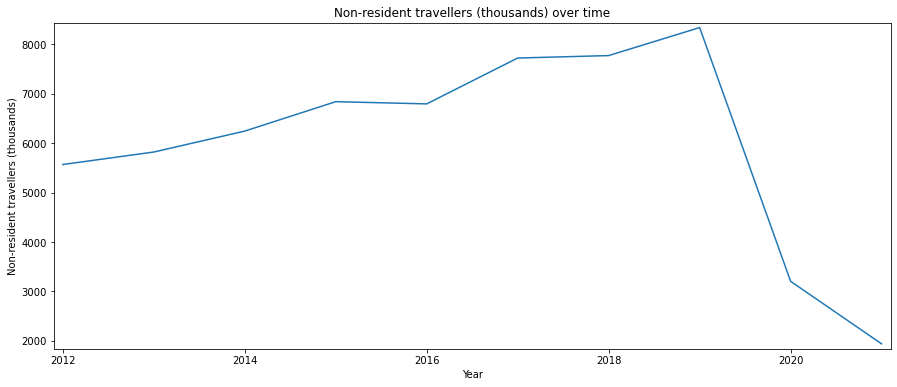

In [13]:
plt.figure(figsize=(15,6));
plt.plot(tua010_total["Year"], tua010_total["Non-resident travellers (thousands)"])

plt.xlabel("Year")
plt.ylabel("Non-resident travellers (thousands)")
plt.title("Non-resident travellers (thousands) over time")
plt.xlim(min(tua010_total["Year"])-0.1, max(tua010_total["Year"])+0.1)
plt.ylim(min(tua010_total["Non-resident travellers (thousands)"])-100, 
         max(tua010_total["Non-resident travellers (thousands)"])+100)
plt.show()

In [14]:
#Data split across countries 
tua030_agg = tua030[tua030['Country'] != 'TOTAL']
tua010_agg = tua010[(tua010['Country']!= 'TOTAL') & (tua010['Non_Res_Travel'] == 'ARRIVALS') 
                    & (~tua010['Country'].str.contains('EU')) & (~tua010['Country'].str.contains('CIS'))]
tua010_agg.head()

,Non_Res_Travel,Country,Year,Non-resident travellers (thousands)
10,ARRIVALS,US,2012,41.4
11,ARRIVALS,US,2013,41.5
12,ARRIVALS,US,2014,30.3
13,ARRIVALS,US,2015,0.0
14,ARRIVALS,US,2016,52.7


In [15]:
#Top 10 countries with largest expenditures 
tua030_metric = tua030_agg.groupby(['Country']).sum()[['Total expenditures of non-resident visitors, million euro']]
tua030_metric_10 = tua030_metric['Total expenditures of non-resident visitors, million euro'].nlargest(10)
others = tua030[tua030['Country'] == 'TOTAL']['Total expenditures of non-resident visitors, million euro'].sum() - tua030_agg.groupby(['Country']).sum()['Total expenditures of non-resident visitors, million euro'].sum()
others_total = tua030_metric.loc[~tua030_metric.index.isin(tua030_metric_10.index), 'Total expenditures of non-resident visitors, million euro'].sum()
tua030_metric_10 = tua030_metric_10.append(pd.Series({'Others': others + others_total}))

In [16]:
#Top 10 countries with largest number of travellers
tua010_metric = tua010_agg.groupby(['Country']).sum()[['Non-resident travellers (thousands)']]
tua010_metric_10 = tua010_metric['Non-resident travellers (thousands)'].nlargest(10)
others_ =  tua010_total['Non-resident travellers (thousands)'].sum() - tua010_metric['Non-resident travellers (thousands)'].sum() 
others_total_ = tua010_metric.loc[~tua010_metric.index.isin(tua010_metric_10.index), 'Non-resident travellers (thousands)'].sum()
tua010_metric_10 = tua010_metric_10.append(pd.Series({'Others': others_ + others_total_}))

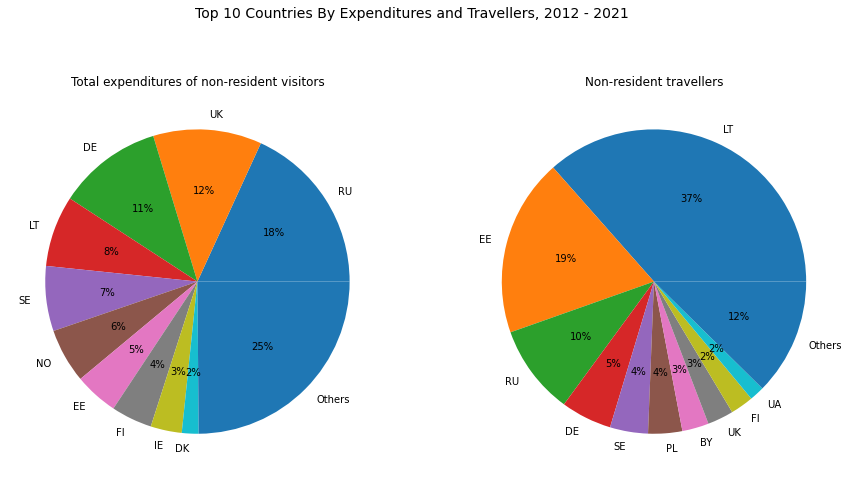

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

ax1.pie(tua030_metric_10, labels=tua030_metric_10.index, autopct='%1.f%%')
ax1.set_title('Total expenditures of non-resident visitors')

ax2.pie(tua010_metric_10, labels=tua010_metric_10.index, autopct='%1.f%%')
ax2.set_title('Non-resident travellers')

plt.suptitle('Top 10 Countries By Expenditures and Travellers, 2012 - 2021', fontsize = 14)
plt.show()

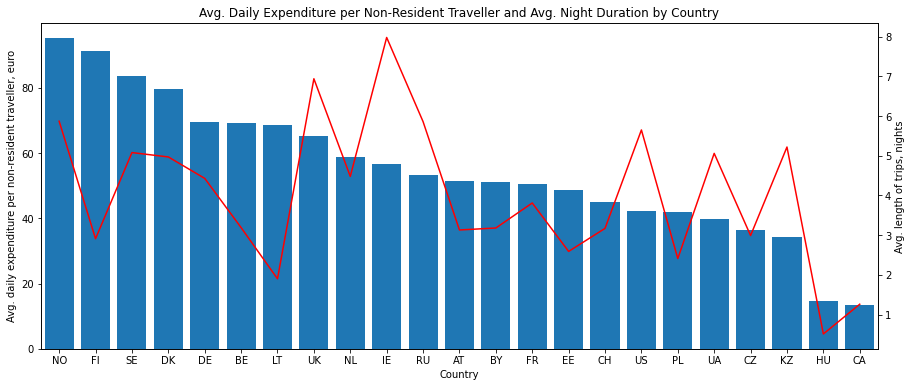

In [18]:
grouped_tua030_agg = tua030_agg.groupby('Country').mean().sort_values('Average daily expenditure per non-resident traveller, euro', ascending = False)

fig, ax1 = plt.subplots(figsize=(15, 6))
ax2 = ax1.twinx()

ax1.bar(grouped_tua030_agg.index, grouped_tua030_agg['Average daily expenditure per non-resident traveller, euro'])
ax1.set_xlabel('Country')
ax1.set_ylabel('Avg. daily expenditure per non-resident traveller, euro')
ax1.set_title('Avg. Daily Expenditure per Non-Resident Traveller and Avg. Night Duration by Country')
num_bars = len(grouped_tua030_agg.index)
ax1.set_xlim(xmin=-0.5, xmax=num_bars-0.5)

ax2.plot(grouped_tua030_agg.index, grouped_tua030_agg['Average length of trips, nights'], color='red')
ax2.set_ylabel('Avg. length of trips, nights');


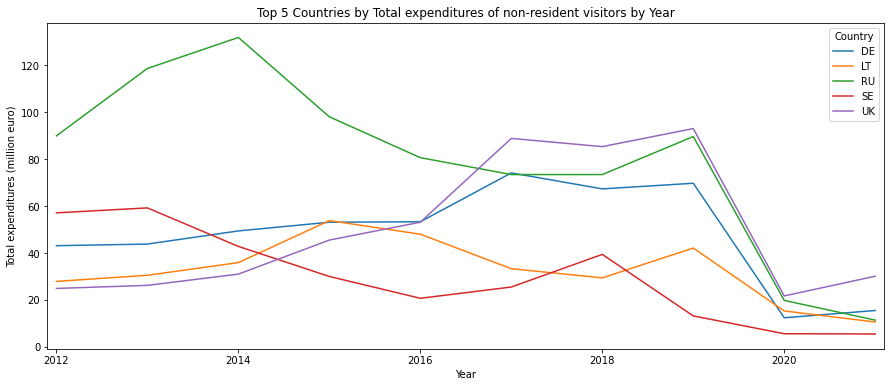

In [19]:
#Top 5 countries dynamics: expenditure 
tua030_grouped = tua030_agg.groupby(['Country', 'Year']).sum()
tua030_largest = tua030_grouped.groupby('Country').sum().nlargest(5, 'Total expenditures of non-resident visitors, million euro').index
tua030_filtered = tua030[tua030['Country'].isin(tua030_largest)]
tua030_pivot = tua030_filtered.pivot(index='Year', columns='Country', values='Total expenditures of non-resident visitors, million euro')
tua030_pivot.plot(kind='line', figsize=(15,6))
plt.title('Top 5 Countries by Total expenditures of non-resident visitors by Year')
plt.xlabel('Year')
plt.ylabel('Total expenditures (million euro)')
plt.xlim(min(tua030_total["Year"])-0.1, max(tua030_total["Year"])+0.1)
plt.show()

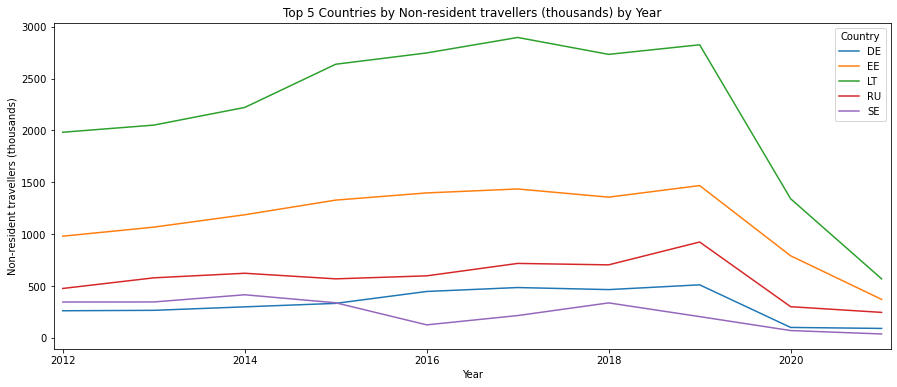

In [20]:
#Top 5 countries dynamics arrivals 
tua010_grouped = tua010_agg.groupby(['Country', 'Year']).sum()
tua010_largest = tua010_grouped.groupby('Country').sum().nlargest(5, 'Non-resident travellers (thousands)').index
tua010_filtered = tua010_agg[tua010_agg['Country'].isin(tua010_largest)]
tua010_pivot = tua010_filtered.pivot(index='Year', columns='Country', values='Non-resident travellers (thousands)')
tua010_pivot.plot(kind='line', figsize=(15,6))
plt.title('Top 5 Countries by Non-resident travellers (thousands) by Year')
plt.xlabel('Year')
plt.ylabel('Non-resident travellers (thousands)')
plt.xlim(min(tua010_total["Year"])-0.1, max(tua010_total["Year"])+0.1)
plt.show()

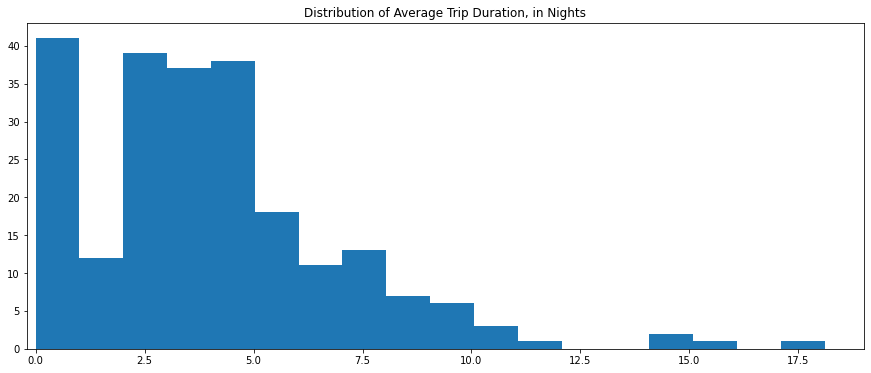

In [21]:
plt.figure(figsize=(15,6))
plt.hist(tua030_agg['Average length of trips, nights'], bins=18)
plt.xlim(xmin=-0.2)
plt.title('Distribution of Average Trip Duration, in Nights');

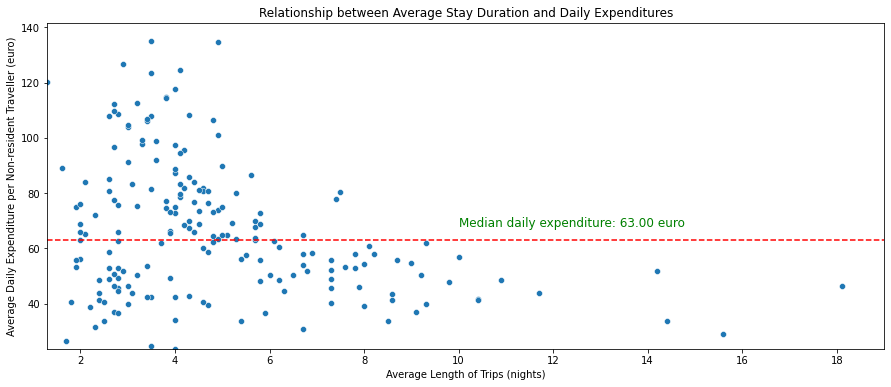

In [22]:
data = tua030_agg
plt.figure(figsize=(15, 6))

# Create scatter plot
sns.scatterplot(y='Average daily expenditure per non-resident traveller, euro', x='Average length of trips, nights', data=data)

# Set x and y-axis limits
plt.ylim(ymin = data[data['Average daily expenditure per non-resident traveller, euro']!=0]['Average daily expenditure per non-resident traveller, euro'].min())
plt.xlim(xmin = data[data['Average length of trips, nights']!=0]['Average length of trips, nights'].min())

# Set x and y labels
plt.ylabel('Average Daily Expenditure per Non-resident Traveller (euro)')
plt.xlabel('Average Length of Trips (nights)')
plt.title("Relationship between Average Stay Duration and Daily Expenditures")

median_expenditure = np.median(data[data['Average daily expenditure per non-resident traveller, euro']!=0]['Average daily expenditure per non-resident traveller, euro'])
plt.axhline(y=median_expenditure, color='r', linestyle='--')
plt.text(10, median_expenditure + 5, f'Median daily expenditure: {median_expenditure:.2f} euro', color='green', fontsize=12)
# Show plot
plt.show()

In [23]:
#Removing regions and total 
tua010_filtered = tua010[(tua010['Country']!= 'TOTAL') & (~tua010['Country'].str.contains('EU')) & (~tua010['Country'].str.contains('CIS'))]

#Creating a pivot table 
pivot_table_010 = pd.pivot_table(tua010_filtered, values=['Non-resident travellers (thousands)'], index=['Country'], 
                                 columns=['Non_Res_Travel'], aggfunc = 'sum')
tua010_flat = pivot_table_010
tua010_flat.columns = tua010_flat.columns.get_level_values(1)
tua010_flat['SINGLE DAY'] = tua010_flat['ARRIVALS'] - tua010_flat['ARRIVALS_OVERNIGHT']
tua010_flat = tua010_flat.rename(columns = {'ARRIVALS': 'TOTAL', 'ARRIVALS_OVERNIGHT': 'MULTIDAY'})
tua010_flat = tua010_flat.sort_values("TOTAL", ascending = False)
tua010_flat.head()

Non_Res_Travel,TOTAL,MULTIDAY,SINGLE DAY
Country,,,
LT,22008.1,2554.2,19453.9
EE,11383.2,1707.8,9675.4
RU,5735.9,2399.9,3336.0
DE,3257.7,1641.7,1616.0
SE,2434.2,972.6,1461.6


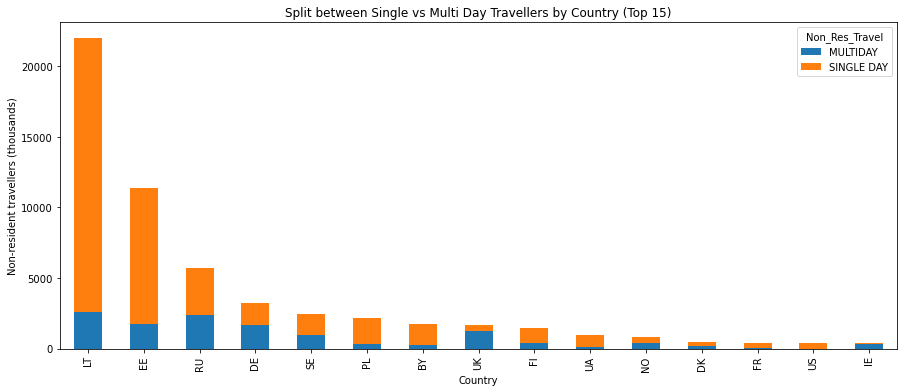

In [24]:
tua010_flat[['MULTIDAY', 'SINGLE DAY']][:15].plot(kind='bar', stacked=True, figsize=(15, 6), 
                                                  ylabel = 'Non-resident travellers (thousands)', 
                                                  title = 'Split between Single vs Multi Day Travellers by Country (Top 15)'); 

#In CSB, single day visitors mean people who didn't stay in hotels or registered tourism accomodations 

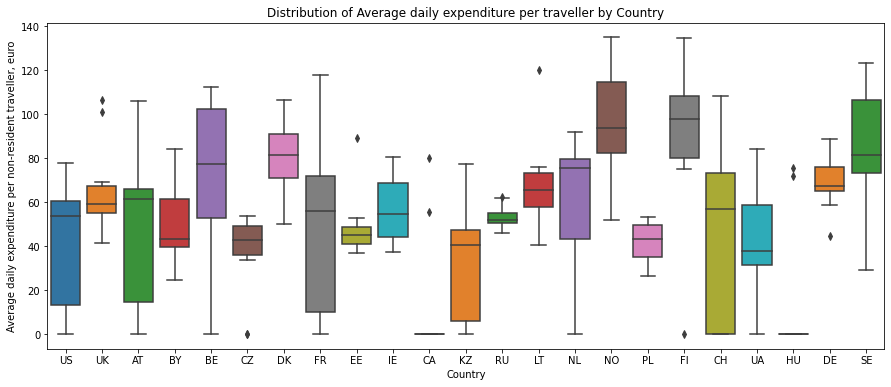

In [25]:
plt.figure(figsize=(15, 6))

sns.boxplot(data = tua030_agg, x = 'Country', y = 'Average daily expenditure per non-resident traveller, euro', palette = 'tab10')
plt.title('Distribution of Average daily expenditure per traveller by Country');

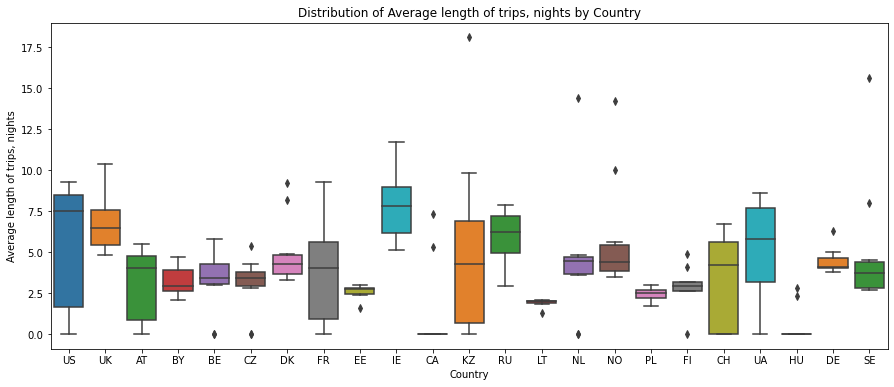

In [26]:
plt.figure(figsize=(15, 6))
sns.boxplot(data = tua030_agg, x = 'Country', y = 'Average length of trips, nights', palette = 'tab10')
plt.title('Distribution of Average length of trips, nights by Country');

In [27]:
# Diagram with main travel objectives (stacked columns by years or others), dataframe tua050

In [ ]:
# Diagram for ages and genders, dataframe tua070. It is in %, so may be worth to merge with tua010 ARRIVALS only to calculate 
#absolute values 

In [ ]:
#Code for importing tables into SQL 